<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.856 · Análisis de sentimientos y redes sociales</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de Datos (<i>Data Science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Análisis de sentimientos y redes sociales
## PLA5: Análisis de redes y detección de comunidades

## Introducción

A continuación se presentarán explicaciones y ejemplos de cálculo e interpretación de métricas que pueden aplicarse a los nodos, a las aristas y a la totalidad de la red, en el proceso de análisis de redes sociales, todos ellos usando la librería networkx. 

Después, se muestran algunos algoritmos de detección de subestructuras locales en los grafos, así como algoritmos de detección de comunidades. Por último, se presentan ejemplos de uso de una de las alternativas más comunes para evaluar una determinada partición en comunidades de una red: la modularidad.

Recordad que podéis ir ejecutando los ejemplos que se incluyen en los notebooks para reproducirlos y obtener sus resultados. Además, os animamos a que modifiquéis el código de los ejemplos y ejecutéis vuestras modificaciones, para ir explorando todo el potencial de las librerías que se presentan en los notebooks.

## 1. Métricas que describen los nodos

### 1.1 Medidas de centralidad

En el PLA4 se ha mostrado cómo calcular una de las métricas más básicas que se usan para describir nodos dentro de una red: su grado. El grado es una métrica que se usa para evaluar la centralidad de los nodos, pero no es la única. La centralidad basada en la intermediación, que cuantifica la fracción de caminos más cortos entre pares de nodos que pasan por el nodo evaluado; la centralidad de proximidad, que cuantifica la distancia media entre un nodo y todos los otros nodos accesibles desde el primero; y la centralidad del vector propio, que evalúa si el nodo está conectado a otros nodos importantes, son también métricas de centralidad, que podemos calcular con las funciones [`betweenness_centrality`](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html), [`closeness_centrality`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality) y [`eigenvector_centrality`](https://networkx.github.io/documentation/stable/_modules/networkx/algorithms/centrality/eigenvector.html).

Para comprobar las diferencias entre las tres métricas de centralidad, definiremos una función que nos mostrará visualmente un grafo, fijando el tamaño de los nodos en función de los valores proporcionados como parámetro. Utilizaremos esta función para mostrar gráficamente los valores de las diferentes medidas de centralidad sobre grafos pequeños, para así comparar qué está evaluando cada una de ellas.


In [43]:
# Activamos matplotlib e indicamos que se muestren los plots en el mismo notebook
# usando un 'magic command' de jupyter
%matplotlib inline

# Importamos networkx
import networkx as nx

# Importamos pyplot
import matplotlib.pyplot as plt

In [44]:
def draw_graph_node_size_prop(g, prop, max_size=500, min_size=20, pos=None, return_pos=False):
    if pos is None:
        pos = nx.kamada_kawai_layout(g)
    # mostramos cada nodo, usando como tamaño el valor que indica el diccionario prop, 
    # normalizado en el intervalo [min_size, max_size]
    r = float(max(prop.values()) - min(prop.values()))
    r = 1 if r==0 else r
    n, p = zip(*[(no, min_size+(max_size-min_size)*si/r) for no, si in prop.items()])
    nx.draw_networkx_nodes(g, pos=pos, nodelist=n, node_size=p)
    # mostramos todas las aristas
    nx.draw_networkx_edges(g, pos=pos)
    
    if return_pos:
        return pos

In [45]:
# Creamos tres grafos de ejemplo
g1 = nx.star_graph(5)
g2 = nx.bull_graph()
g3 = nx.balanced_tree(3, 3)

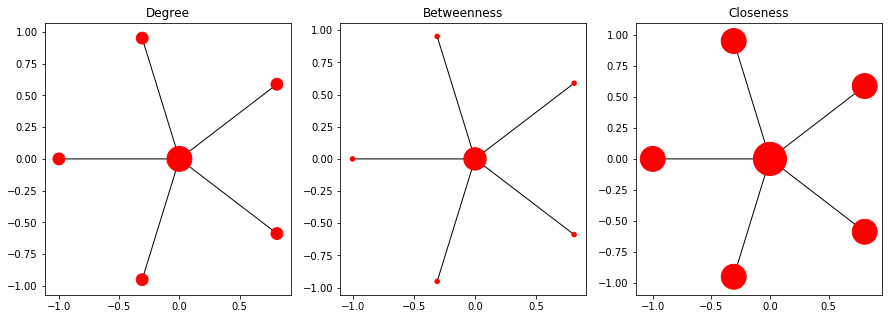

In [46]:
# Creamos tres visualizaciones del grafo 1, utilizando el tamaño de los nodos para indicar el grado,
# la centralidad de intermediación y la centralidad de proximidad, respectivamente
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
ax.set_title("Degree")
draw_graph_node_size_prop(g1, dict(nx.degree(g1)))

ax = plt.subplot(1, 3, 2)
ax.set_title("Betweenness")
draw_graph_node_size_prop(g1, nx.betweenness_centrality(g1))

ax = plt.subplot(1, 3, 3)
ax.set_title("Closeness")
draw_graph_node_size_prop(g1, nx.closeness_centrality(g1))

En un grafo en forma de estrella, siempre hay un nodo con un grado mucho mayor que el resto. Este nodo también tiene mayor centralidad de intermediación, ya que todos los caminos entre cualquier par de nodos del grafo pasan por él. En cambio, aunque este también tiene una mayor centralidad de proximidad, la diferencia con la centralidad de proximidad del resto de los nodos no es tan grande.

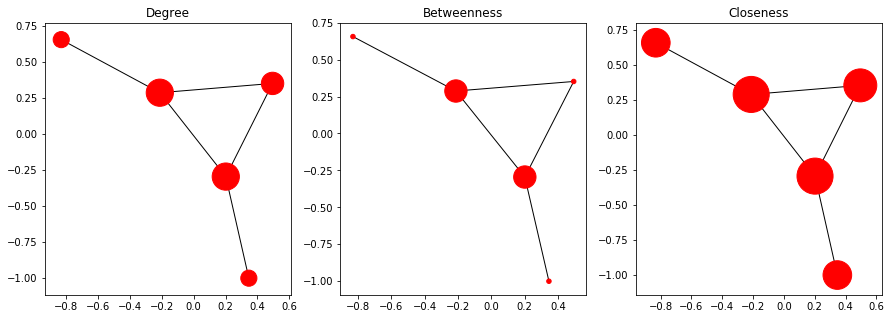

In [47]:
# Creamos tres visualizaciones del grafo 2, utilizando el tamaño de los nodos para indicar el grado,
# la centralidad de intermediación y la centralidad de proximidad, respectivamente
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
ax.set_title("Degree")
draw_graph_node_size_prop(g2, dict(nx.degree(g2)))

ax = plt.subplot(1, 3, 2)
ax.set_title("Betweenness")
draw_graph_node_size_prop(g2, nx.betweenness_centrality(g2))

ax = plt.subplot(1, 3, 3)
ax.set_title("Closeness")
draw_graph_node_size_prop(g2, nx.closeness_centrality(g2))

El nodo dibujado más a la derecha de las imágenes tiene grado dos, superior al grado de dos nodos e inferior al de los otros dos. En cambio, la centralidad de intermediación de este nodo es muy baja, ya que los caminos más cortos entre cualquier otro par de nodos nunca pasan por él.

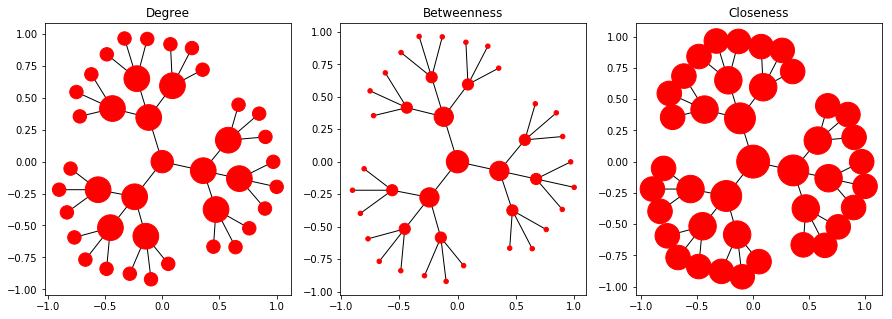

In [48]:
# Creamos tres visualizaciones del grafo 3, utilizando el tamaño de los nodos para indicar el grado,
# la centralidad de intermediación y la centralidad de proximidad, respectivamente
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
ax.set_title("Degree")
draw_graph_node_size_prop(g3, dict(nx.degree(g3)))

ax = plt.subplot(1, 3, 2)
ax.set_title("Betweenness")
draw_graph_node_size_prop(g3, nx.betweenness_centrality(g3))

ax = plt.subplot(1, 3, 3)
ax.set_title("Closeness")
draw_graph_node_size_prop(g3, nx.closeness_centrality(g3))

Los nodos con mayor grado (grado cuatro) no tienen la mayor centralidad de intermediación ni de proximidad, que en el caso de grafo mostrado arriba, es para el nodo del centro de la imagen (que tiene grado tres).

In [49]:
# Importamos la librería copy
from copy import deepcopy 

# Creamos dos grafos de ejemplo
g3 = nx.balanced_tree(3, 3)
g3p = deepcopy(g3)
g3p.add_edges_from([(1,2), (2,3), (3,1)])

El código anterior utiliza la librería [`copy`](https://docs.python.org/2/library/copy.html). Podéis consultar la documentación de la librería para ver porqué necesitamos hacer uso de ella en este ejemplo.

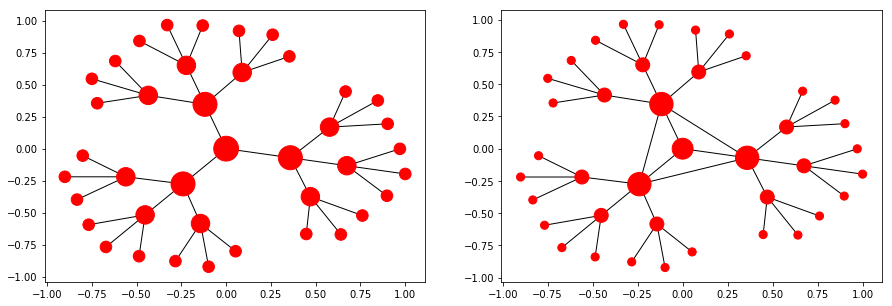

In [50]:
# Creamos dos visualizaciones de dos grafos distintos, utilizando el tamaño de los nodos para indicar
# la centralidad del vector propio
# Nota: observad que, a diferencia de en las visualizaciones anteriores, en este caso las visualizaciones
# corresponden a grafos distintos (en vez de ser un solo grafo mostrando varias métricas)
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 2, 1)
pos = draw_graph_node_size_prop(g3, nx.eigenvector_centrality(g3), return_pos=True)

ax = plt.subplot(1, 2, 2)
draw_graph_node_size_prop(g3p, nx.eigenvector_centrality(g3p), pos=pos)

Los dos grafos tienen el mismo número de nodos y difieren únicamente en la existencia de tres aristas, que conectan los tres nodos que rodean el nodo del medio de la visualización. En el grafo de la izquierda, los tres nodos con mayor centralidad de vector propio son precisamente estos tres nodos, mientras que el nodo del centro de la imagen tiene una centralidad inferior. En cambio, en el grafo de la derecha, el nodo con mayor centralidad de vector propio es el que se encuentra en el centro de la imagen.


### 1.2 Medidas de agrupamiento

El coeficiente de agrupamiento (o *cc*, por sus siglas en inglés, *clustering coefficient*) es otra métrica que sirve para describir nodos, y que cuantifica lo conectados que están entre ellos los vecinos de un nodo. Veámoslo con un ejemplo, utilizando la función [`clustering`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering).

In [51]:
# Creamos tres grafos de ejemplo
g4 = nx.complete_graph(4)
g5 = nx.balanced_tree(3, 1)
g6 = deepcopy(g5)
g6.add_edges_from([(1, 2)])

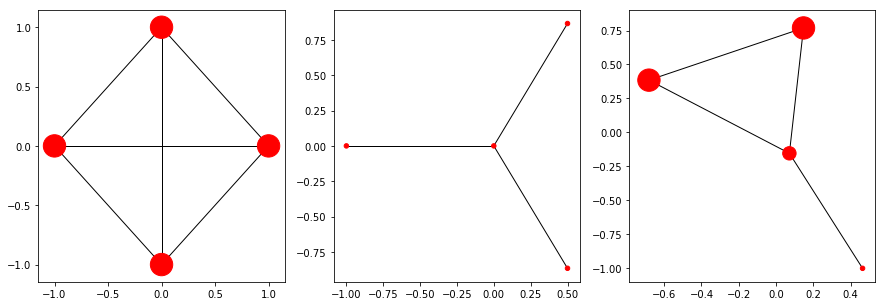

In [52]:
# Creamos tres visualizaciones de tres grafos distintos, utilizando el tamaño de los nodos para indicar el
# coeficiente de agrupamiento
# Nota: observad que, a diferencia de en las visualizaciones de centralidad, en este caso las visualizaciones
# corresponden a grafos distintos (en vez de ser un solo grafo mostrando varias métricas)
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
draw_graph_node_size_prop(g4, dict(nx.clustering(g4)))

ax = plt.subplot(1, 3, 2)
draw_graph_node_size_prop(g5, nx.clustering(g5))

ax = plt.subplot(1, 3, 3)
draw_graph_node_size_prop(g6, nx.clustering(g6))


El primer grafo es un grafo completo, por lo que el coeficiente de agrupamiento es máximo para todos los nodos. Por el contrario, en el segundo grafo el coeficiente de agrupamiento es mínimo para todos los nodos, ya que ningún nodo tiene vecinos que se encuentren conectados entre ellos. Por último, en el tercer grafo, los dos nodos superiores tienen un coeficiente de agrupamiento máximo, ya que sus vecinos se encuentran conectados entre ellos. El nodo del centro tiene dos de sus tres vecinos conectados, por lo que el coeficiente de agrupamiento es 1/3. 

## 2. Métricas que describen las aristas

Networkx también dispone de métricas de las aristas, como la centralidad basada en la intermediación de las aristas (que puede calcularse con la función [`edge_betweenness_centrality`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality)) o la centralidad de intermediación del flujo de corriente (cuyo cálculo implementa la función [`edge_current_flow_betweenness_centrality`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_current_flow_betweenness_centrality.html#networkx.algorithms.centrality.edge_current_flow_betweenness_centrality)).

Para poder visualizar los valores de la centralidad de intermediación de las aristas, en primer lugar adaptamos la función de visualización, para que muestre los nodos con un tamaño fijo y las aristas con una anchura proporcional a los valores de la centralidad:

In [53]:
def draw_graph_edge_size_prop(g, prop, max_size=5, min_size=0.5, pos=None, return_pos=False):
    if pos is None:
        pos = nx.kamada_kawai_layout(g)

    # mostramos todos los nodos
    nx.draw_networkx_nodes(g, pos=pos)

    # mostramos las aristas, usando como ancho el valor que indica el diccionario prop, 
    # normalizado en el intervalo [min_size, max_size]
    r = float(max(prop.values()) - min(prop.values()))
    r = 1 if r==0 else r
    e, p = zip(*[(ed, min_size+(max_size-min_size)*wi/r) for ed, wi in prop.items()])
    nx.draw_networkx_edges(g, pos=pos, edgelist=e, width=p)
    
    if return_pos:
        return pos

Vamos a mostrar la centralidad de intermediación de las aristas del grafo del club de karate:

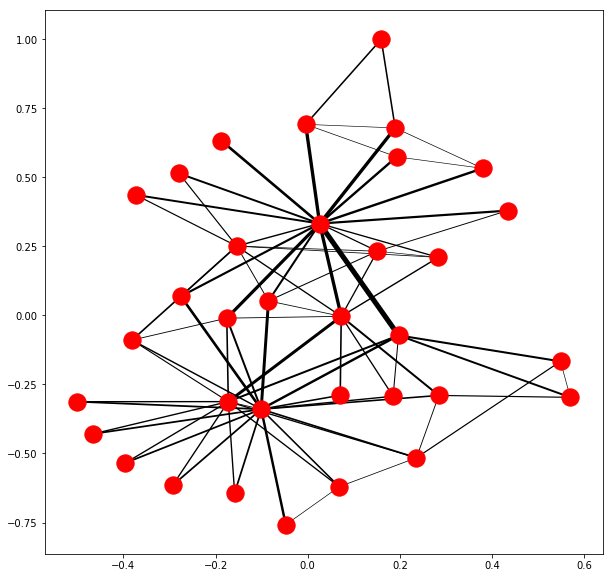

In [54]:
# Cargamos el grafo del club de karate
g = nx.karate_club_graph()

# Mostramos el grafo, indicando su centralidad con el ancho de la arista 
plt.figure(num=None, figsize=(10, 10))
ebc = nx.edge_betweenness_centrality(g, normalized=True)
draw_graph_edge_size_prop(g, ebc)

Podemos comparar el resultado con otras métricas de centralidad de aristas, por ejemplo, la centralidad basada en flujo de corriente:

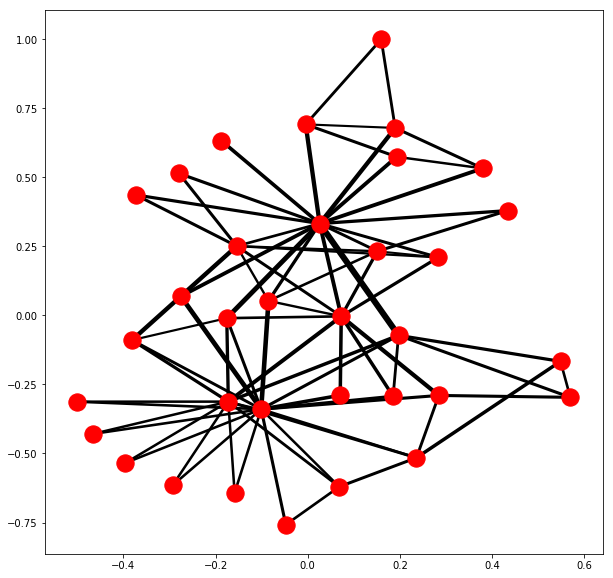

In [55]:
# Visualizamos la centralidad basada en el flujo de corriente
plt.figure(num=None, figsize=(10, 10))
ebc = nx.edge_current_flow_betweenness_centrality(g, normalized=True)
draw_graph_edge_size_prop(g, ebc)

## 3. Métricas que describen las redes

### 3.1 Medidas de agrupamiento

Hemos visto que el coeficiente de agrupamiento se utiliza para describir los nodos de un grafo. El coeficiente de agrupamiento medio de los nodos de una red se usa para describir una red, y puede calcularse directamente utilizando la función [`average_clustering`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering) o bien calculando la media de los valores de cada nodo. 

In [56]:
# Importamos la librería numpy
import numpy as np

# Calculamos el coeficiente de agrupamiento medio de la red
print("Cálculo usando average_clustering: {}".format(nx.average_clustering(g6)))
print("Cálculo usando clustering: {}".format(np.mean(list(nx.clustering(g6).values()))))

Cálculo usando average_clustering: 0.5833333333333333
Cálculo usando clustering: 0.5833333333333333


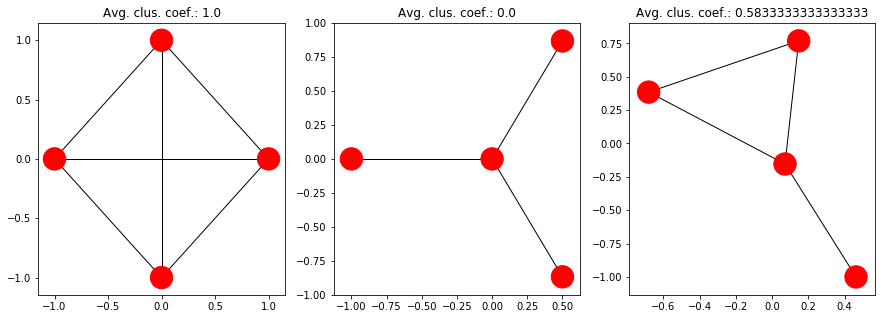

In [57]:
# Creamos tres visualizaciones de tres grafos de cuatro nodos distintos,
# indicando el coeficiente de agrupamiento medio en el título de la figura
# Nota: en este caso, el tamaño de los nodos es constante.

plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
ax.set_title("Avg. clus. coef.: {}".format(nx.average_clustering(g4)))
draw_graph_node_size_prop(g4, {node: 1 for node in g4.nodes()})

ax = plt.subplot(1, 3, 2)
ax.set_title("Avg. clus. coef.: {}".format(nx.average_clustering(g5)))
draw_graph_node_size_prop(g5, {node: 1 for node in g5.nodes()})

ax = plt.subplot(1, 3, 3)
ax.set_title("Avg. clus. coef.: {}".format(nx.average_clustering(g6)))
draw_graph_node_size_prop(g6, {node: 1 for node in g6.nodes()})

Podemos ver que el grafo de la izquierda tiene coeficiente de agrupamiento medio igual a 1, ya que todos sus nodos tienen un cc de 1. De un modo análogo, el grafo del medio tiene un cc medio de 0, ya que este es el valor del cc de todos sus nodos. Por último, el grafo de la derecha tiene nodos con cc diversos, que tienen una media de 0.58.

### 3.2 Distancias

En el PLA anterior hemos visto algunas métricas sobre distancias que podían utilizarse para describir una red, como son el diámetro, el radio y la media de la longitud de los caminos más cortos.

In [58]:
# Cargamos el grafo
g = nx.karate_club_graph()
# Mostramos el diámetro, el radio y la media de los caminos más cortos entre pares de nodos
print("El diámetro del grafo es: {}".format(nx.diameter(g)))
print("El radio del grafo es: {}".format(nx.radius(g)))
print("La media de los caminos más cortos del grafo es: {}".format(nx.average_shortest_path_length(g)))

El diámetro del grafo es: 5
El radio del grafo es: 3
La media de los caminos más cortos del grafo es: 2.408199643493761


Otras métricas relacionadas con las distancias que permiten describir un grafo son el tamaño del centro (el número de nodos que tienen excentricidad igual al radio) y el tamaño de la periferia (el número de nodos con excentricidad igual al diámetro). Podemos obtener una lista de los nodos en el centro y en la periferia de un grafo usando las funciones [`center`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.center.html#networkx.algorithms.distance_measures.center) y [`periphery`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.periphery.html#networkx.algorithms.distance_measures.periphery), respectivamente.

In [59]:
print("El número de nodos en el centro es: {}".format(len(nx.center(g))))
print("El número de nodos en la periferia es: {}".format(len(nx.periphery(g))))

El número de nodos en el centro es: 8
El número de nodos en la periferia es: 9


Podemos visualizar los nodos que se encuentran en el centro y en la periferia del grafo del club de Karate:

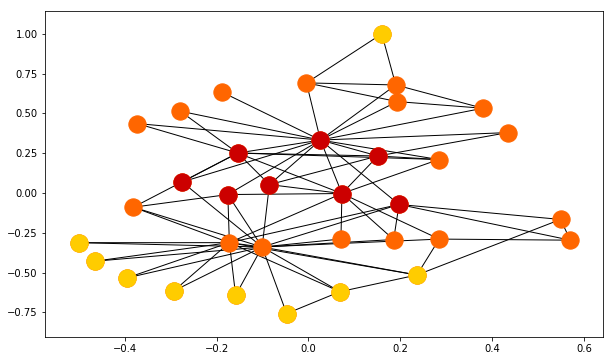

In [60]:
plt.figure(num=None, figsize=(10, 6))
pos = nx.kamada_kawai_layout(g)

# Mostramos todos los nodos en color naranja
nx.draw_networkx_nodes(g,  pos=pos, node_color='#ff6600')
# Mostramos las aristas
nx.draw_networkx_edges(g, pos=pos)

# Repintamos los nodos del centro en color rojo
nx.draw_networkx_nodes(g, pos=pos, nodelist=nx.center(g), node_color='#cc0000')
# Repintamos los nodos de la periferia en color amarillo
nx.draw_networkx_nodes(g, pos=pos, nodelist=nx.periphery(g), node_color='#ffcc00')

### 3.3 Asortatividad

Otra de las métricas que podemos usar para describir una red es su asortatividad, es decir, la tendencia que muestran los nodos a conectarse a otros nodos similares. En un grafo con asortatividad cercana a 1, los nodos tenderán a conectarse a otros similares, mientras que en un grafo con asortatividad cercana a -1, la tendencia de los nodos será la de conectarse a otros nodos diferentes a ellos. 

Podemos calcular la asortatividad en función de cualquier valor numérico o propiedad categórica de los nodos.

In [61]:
import random

g = nx.karate_club_graph()

# Calculamos la asortividad en función del grado
deg_assort = nx.degree_assortativity_coefficient(g)
print("La asortatividad en función del grado es: {}".format(deg_assort))

# Calculamos la asortatividad en función del club
club_assort = nx.attribute_assortativity_coefficient(g, 'club')
print("La asortatividad en función del club es: {}".format(club_assort))

# Calculamos la asortatividad en función de una etiqueta que asignamos aleatóriamente
nx.set_node_attributes(g, {node: random.randint(0,1) for node in g.nodes}, name='random_label')
r_assort = nx.attribute_assortativity_coefficient(g, 'random_label')
print("La asortatividad en función de una etiqueta aleatoria es: {}".format(r_assort))

La asortatividad en función del grado es: -0.47561309768461457
La asortatividad en función del club es: 0.717530864197531
La asortatividad en función de una etiqueta aleatoria es: 0.07762731260728581


Así pues, los nodos del club de Karate presentan una tendencia a conectarse a otros nodos del mismo club (la asortatividad es positiva) y a nodos con grado distinto (la asortatividad es negativa). Además, la asortatividad en función de una etiqueta es cercana a 0, por lo que los nodos no muestran ninguna tendencia a conectarse a otros nodos en función de la etiqueta (ni a nodos con la misma etiqueta, ni a nodos con la etiqueta distinta).

## 4. Detección de comunidades

### 4.1 Subestructuras locales

Las subestructuras locales que presenta una red pueden sernos de utilidad tanto para caracterizar las redes como para estudiar las comunidades que esta presenta. Así pues, en lo que respecta a la caracterización de la red, la existencia de ciertas subestructuras en la red, así como las características de estas subestructuras, nos permiten describir redes (igual que las métricas que hemos visto en el apartado 3). Por otro lado, estas subestructuras nos permiten identificar comunidades con ciertas propiedades de cohesión o conectividad.

Un clique es un subgrafo completo de un grafo, es decir, un subgrafo en el que todos los nodos se encuentran conectados entre ellos dos a dos. La función [`enumerate_all_cliques`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.enumerate_all_cliques.html#networkx.algorithms.clique.enumerate_all_cliques) nos permite obtener todos los cliques de un grafo. 

In [62]:
# Cargamos el grafo del club de karate
g = nx.karate_club_graph()

# Obtenermos todos los cliques y los ordenamos por tamaño
cliques_by_size = sorted(nx.enumerate_all_cliques(g), key=len, reverse=True)

# Mostramos el número de cliques encontrados
print("Hay {} cliques en el grafo".format(len(cliques_by_size)))

Hay 170 cliques en el grafo


Vamos a visualizar algunos de los cliques existentes en el grafo del club de karate. En concreto, generaremos 3 figuras, mostrando 3 de los cliques de mayor tamaño del grafo:

In [63]:
# Definimos una función que muestre el grafo, resaltando algunos nodos cambiando el color
def draw_graph_node_color(g, nodes=[]):
    pos = nx.kamada_kawai_layout(g)
    # mostramos las aristas
    nx.draw_networkx_edges(g, pos=pos)
    # mostramos todos los nodos en color naranja
    nx.draw_networkx_nodes(g, pos=pos, node_color='#ff6600')
    # repintamos los nodos a destacar en color rojo
    nx.draw_networkx_nodes(g, pos=pos, nodelist=nodes, node_color='#cc0000')
    # mostramos las etiquetas de los nodos destacados
    nx.draw_networkx_labels(g, pos=pos)
    

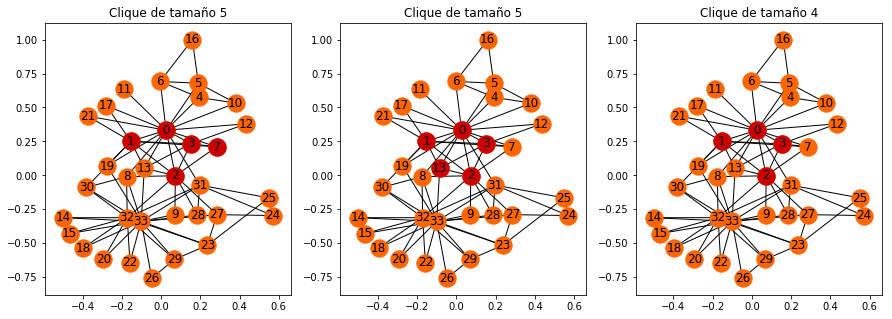

In [64]:
plt.figure(num=None, figsize=(15, 5))

# Mostramos el clique de mayor tamaño
ax = plt.subplot(1, 3, 1)
ax.set_title("Clique de tamaño {}".format(len(cliques_by_size[0])))
draw_graph_node_color(g, nodes=cliques_by_size[0])

# Mostramos el segundo clique de mayor tamaño
ax = plt.subplot(1, 3, 2)
ax.set_title("Clique de tamaño {}".format(len(cliques_by_size[1])))
draw_graph_node_color(g, nodes=cliques_by_size[1])

# Mostramos el tercer clique de mayor tamaño
ax = plt.subplot(1, 3, 3)
ax.set_title("Clique de tamaño {}".format(len(cliques_by_size[2])))
draw_graph_node_color(g, nodes=cliques_by_size[2])


En este caso, el grafo tiene dos cliques de 5 nodos. Es interesante ver como el subconjunto de nodos [0, 1, 2] aparecen en los 3 cliques.

El número de nodos del mayor clique de un grafo se llama número de clique (en inglés, *clique number*) y es un valor que se utiliza para describir la red. Si ya hemos calculado todos los cliques de un grafo, podemos obtener el número de cliques mirando el número de nodos del mayor clique encontrado:

In [65]:
print("El número de nodos del mayor clique es: {}".format(len(cliques_by_size[0])))

El número de nodos del mayor clique es: 5


Networkx también dispone de funciones para obtener únicamente el clique de máximo tamaño, o bien el número de clique [`graph_clique_number`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.graph_clique_number.html#networkx.algorithms.clique.graph_clique_number):

In [66]:
from networkx.algorithms.approximation.clique import max_clique

print("El mayor clique es: {}".format(max_clique(g)))
print("El número de nodos del mayor clique es: {}".format(len(max_clique(g))))
print("El número de cliques es: {}".format(nx.graph_clique_number(g)))

El mayor clique es: {0, 1, 2, 3, 7}
El número de nodos del mayor clique es: 5
El número de cliques es: 5


Existen otras subestructuras de interés más allá de los cliques. Por ejemplo, un *k-core* es un grafo maximal que contiene únicamente nodos de grado como mínimo k. Es decir, cada nodo del *k-core* será adyacente como mínimo a otros k nodos del *k-core*. Networkx nos permite calcular los *k-cores* de un grafo con la función [`k_core`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.core.k_core.html).

Hemos encontrado un 4-core
El 4-core tiene 10 nodos


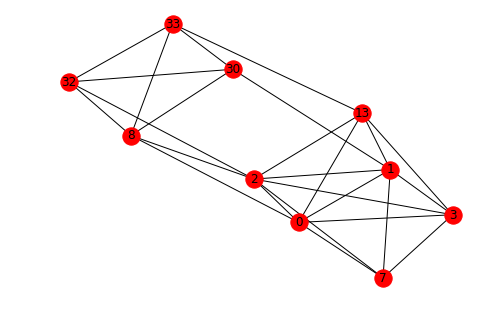

In [67]:
from networkx.algorithms.core import k_core

# Calculamos el k-core con mayor grado del grafo
kcore = k_core(g)

# Mostramos el k-core
nx.draw(kcore, with_labels=True)

# Mostramos el grado mínimo del subgrafo y el número de nodos del k-core
k = min(dict(kcore.degree()).values())
print("Hemos encontrado un {}-core".format(k))
print("El {}-core tiene {} nodos".format(k, len(kcore.nodes())))

Hemos encontrado un *4-core*, es decir, un subgrafo maximal en el que todos los nodos del subgrafo tienen, como mínimo, grado 4. Es es el *k-core* con mayor k que podemos encontrar en el grafo: no existe ningún *k-core* para k mayor que 4. En cambio, sí que podríamos encontrar *k-cores* para valores de k inferiores a 4.

In [68]:
# Intentemos buscar un 5-core del grafo, pero no lo logramos
k_core(g, 5).node()

NodeView(())

Hemos encontrado un 3-core
El 3-core tiene 22 nodos


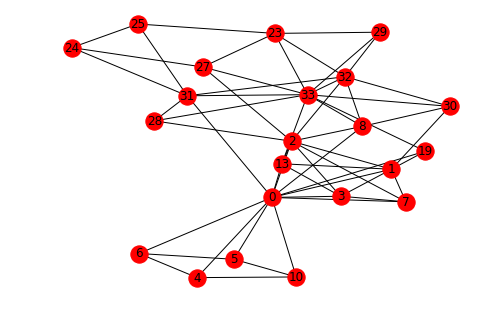

In [69]:
# Calculamos el 3-core del grafo
kcore_3 = k_core(g, 3)

# Mostramos el 3-core
nx.draw(kcore_3, with_labels=True)

# Mostramos el grado mínimo del subgrafo y el número de nodos del k-core
k = min(dict(kcore_3.degree()).values())
print("Hemos encontrado un {}-core".format(k))
print("El {}-core tiene {} nodos".format(k, len(kcore_3.nodes())))

### 4.2 Algoritmos de detección de comunidades y evaluación de comunidades

Networkx incorpora diferentes algoritmos de detección de comunidades. Veamos cómo podemos usarlos para detectar comunidades y evaluarlas. 

En primer lugar, haremos una nueva versión de la función de dibujo de grafos, que nos mostrará los nodos en colores distintos atendiendo a la comunidad a la que pertenecen.

In [70]:
# Definimos una función que muestre el grafo, mostrando cada grupo de nodos con un color distinto
def draw_graph_node_colors(g, nodes=[]):
    pos = nx.kamada_kawai_layout(g)
    # mostramos las aristas
    nx.draw_networkx_edges(g, pos=pos)
    cmap = plt.cm.hsv
    for i, group in enumerate(nodes):
        # mostramos los nodos del grupo
        nx.draw_networkx_nodes(g, pos=pos, nodelist=group, node_color=cmap(i/len(nodes)))

Aplicamos el algoritmo de Clauset-Newman-Moore de detección de comunidades que incorpora networkx al grafo del club de karate:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Se han detectado 3 comunidades: 
	Comunidad 0 (17 nodos):	[32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
	Comunidad 1 (9 nodos):	[1, 2, 3, 7, 9, 12, 13, 17, 21]
	Comunidad 2 (8 nodos):	[0, 4, 5, 6, 10, 11, 16, 19]


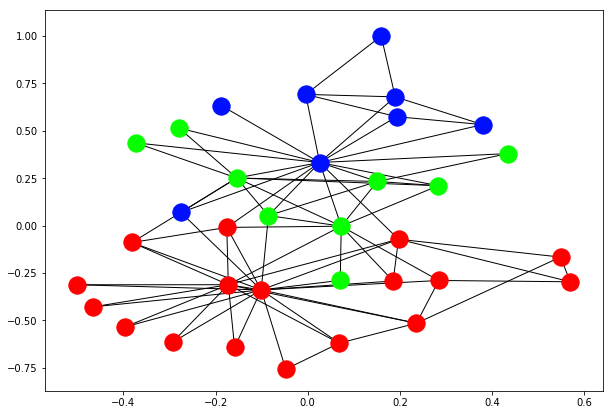

In [71]:
from networkx.algorithms.community import modularity_max as nxmod

g = nx.karate_club_graph()

# Detectamos comunidades en el grafo de karate con el algoritmo de Clauset-Newman-Moore:
com_mod = nxmod.greedy_modularity_communities(g)

# Mostramos las comunidades detectadas
plt.figure(num=None, figsize=(10, 7))
draw_graph_node_colors(g, com_mod)
print("Se han detectado {} comunidades: ".format(len(com_mod)))

for i, c in enumerate(com_mod):
    print("\tComunidad {} ({} nodos):\t{}".format(i, len(c), list(c)))

El algoritmo detecta 3 comunidades, una de ellas con 17 nodos y dos de ellas más pequeñas de 8 y 9 nodos, respectivamente. 

Networkx incorpora también otros algoritmos de detección de comunidades, como por ejemplo, el de Girvan Newman. Veamos las particiones que obtenemos usando este algoritmo:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Se han detectado 2 comunidades: 
	Comunidad 0 (15 nodos):	[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
	Comunidad 1 (19 nodos):	[32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


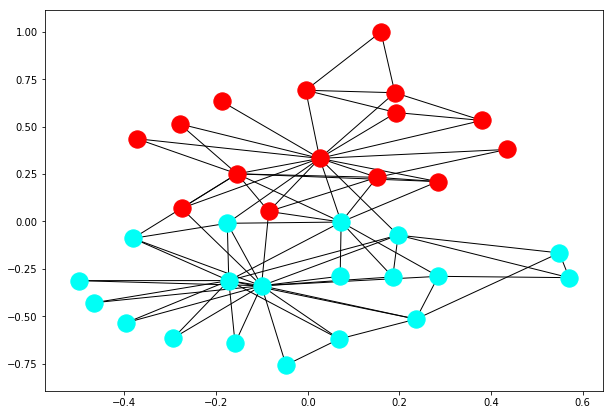

In [72]:
from networkx.algorithms import community as nxcom

# Obtenemos una división en comunidades con Girvan Newman
coms_gn = nxcom.girvan_newman(g)
one_part_gn = next(coms_gn)

# Mostramos las comunidades gráficamente
plt.figure(num=None, figsize=(10, 7))
draw_graph_node_colors(g, one_part_gn)
print("Se han detectado {} comunidades: ".format(len(one_part_gn)))

for i, c in enumerate(one_part_gn):
    print("\tComunidad {} ({} nodos):\t{}".format(i, len(c), list(c)))    

Podemos usar la modularidad para medir si la partición en comunidades que hemos encontrado es buena. Para ello, haremos uso de la librería `python-louvain`, que se importa como `community` en Python (aunque el nombre de la librería en `pip` es `python-louvain`). Observad que anteriormente hemos importado el módulo `community` de `networkx` como `nxcom` para evitar confusiones a la hora de usar ambas librerías.

In [73]:
# Importamos la librería community
import community

# Definimos una función que cambia el formato de descripción de comunidades: de lista de listas de nodos
# a diccionario
def comm_list_to_dict(comm_list):
    return {node: i for i, communit in enumerate(comm_list) for node in communit}

# Calculamos la modularidad de las comunidades detectadas con el algoritmo de Clauset-Newman-Moore, 
# cambiando primero el formato de representación de las comunidades
mod_gmc = community.modularity(comm_list_to_dict(com_mod), g)
print("La modularidad de las comunidades calculadas con greedy_modularity_communities es: " + str(mod_gmc))

# Calculamos la modularidad de las comunidades detectadas con el algoritmo de Girvan Newman
mod_gmc = community.modularity(comm_list_to_dict(one_part_gn), g)
print("La modularidad de las comunidades calculadas con girvan_newman es: " + str(mod_gmc))

La modularidad de las comunidades calculadas con greedy_modularity_communities es: 0.3806706114398422
La modularidad de las comunidades calculadas con girvan_newman es: 0.35996055226824464


Veamos si podemos obtener alguna partición en comunidades algo mejor (evaluándola a partir de la modularidad). `Community` incorpora un algoritmo que intenta encontrar la mejor división en comunidades considerando la modularidad como métrica que se ha de optimizar:

In [74]:
# Calculamos las particiones con `best_partition`, un algoritmo que tiene como objetivo maximizar
# la modularidad
part = community.best_partition(g)
mod = community.modularity(part, g)

print("La modularidad es: " + str(mod))

La modularidad es: 0.4188034188034188


Como hemos visto en el libro *Análisis de datos de redes sociales*, algunos algoritmos de detección de comunidades (por ejemplo el algoritmo de Girvan Newman) son algoritmos jerárquicos. Esto implica que nos proporcionan diferentes particiones de la red, a distintos niveles. Vamos a analizar las comunidades que detecta el algoritmo de Girvan Newman a todos los posibles niveles de la jerarquía, y realizaremos una función que nos retorne la mejor partición que encuentra este algoritmo:

In [75]:
from copy import copy

# Definimos una función que busca el mejor particionamiento, según la modularidad, con Girvan Newman
def best_partition_with_girvan_newman(g):
    
    # detectamos las comunidades
    coms_per_level = nxcom.girvan_newman(g)
    
    # seleccionamos el mejor nivel
    max_mod, m_level, m_numcoms, m_coms = float('-inf'), None, None, None
    for level, communities in enumerate(coms_per_level):
        print("Hay {} comunidades en el nivel {}".format(len(communities), level))
        print("con número de nodos: {}".format([len(com) for com in communities]))
        d = {node: i for i, com in enumerate(communities) for node in com}
        m = community.modularity(d, g)
        print("La modularidad es: {}".format(m))
        if m > max_mod:
            max_mod = m
            m_level = level
            m_numcoms = len(communities)
            m_coms = copy(communities)
        print("----")

    print("\nModularidad máxima: {} ({} comunidades, nivel {})".format(max_mod, m_numcoms, m_level))
    print(m_coms)

In [76]:
best_partition_with_girvan_newman(g)

Hay 2 comunidades en el nivel 0
con número de nodos: [15, 19]
La modularidad es: 0.35996055226824464
----
Hay 3 comunidades en el nivel 1
con número de nodos: [15, 18, 1]
La modularidad es: 0.34878369493754113
----
Hay 4 comunidades en el nivel 2
con número de nodos: [10, 18, 5, 1]
La modularidad es: 0.3632478632478633
----
Hay 5 comunidades en el nivel 3
con número de nodos: [10, 6, 5, 12, 1]
La modularidad es: 0.40129848783694944
----
Hay 6 comunidades en el nivel 4
con número de nodos: [9, 6, 5, 12, 1, 1]
La modularidad es: 0.3925049309664695
----
Hay 7 comunidades en el nivel 5
con número de nodos: [9, 6, 5, 11, 1, 1, 1]
La modularidad es: 0.3762327416173571
----
Hay 8 comunidades en el nivel 6
con número de nodos: [8, 6, 5, 11, 1, 1, 1, 1]
La modularidad es: 0.35831689677843537
----
Hay 9 comunidades en el nivel 7
con número de nodos: [8, 6, 5, 10, 1, 1, 1, 1, 1]
La modularidad es: 0.341715976331361
----
Hay 10 comunidades en el nivel 8
con número de nodos: [8, 6, 5, 9, 1, 1, 1, 1

Así pues, la mayor modularidad se consigue con el particionamiento a nivel 3, que consta de 5 comunidades con 10, 6, 5, 12 y 1 nodo, respectivamente.

Por último, veamos como se han ido generando las comunidades a través de distintas iteraciones (que dan lugar a las particiones a distintos niveles):

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

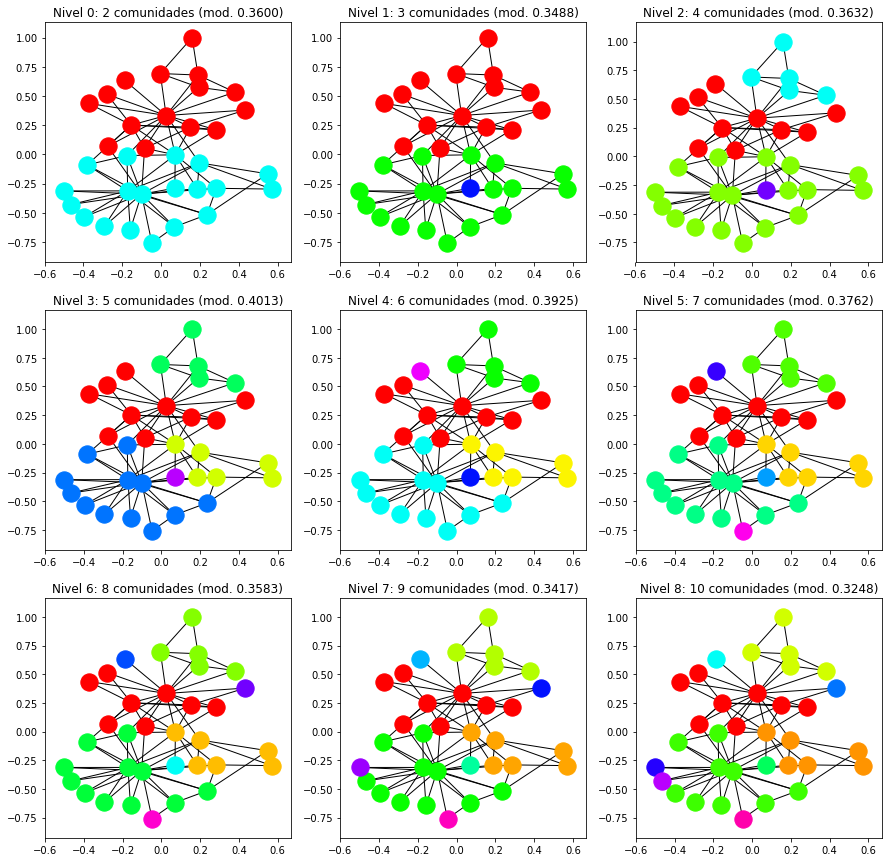

In [77]:
plt.figure(num=None, figsize=(15, 15))

# Detectamos las comunidades
coms_per_level = nxcom.girvan_newman(g)

# Mostramos los 10 primeros niveles
for r in range(1, 10):
    ax = plt.subplot(3, 3, r)
    communities = next(coms_per_level)
    m = community.modularity(comm_list_to_dict(communities), g)
    draw_graph_node_colors(g, communities)
    ax.set_title("Nivel {}: {} comunidades (mod. {:.4f})".format(r-1, len(communities), m))